<a href="https://colab.research.google.com/github/kmkarakaya/Deep-Learning-Tutorials/blob/master/Char_Level_Text_Generation_with_an_Encoder_Decoder_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# PREPARATION

In [48]:
import tensorflow as tf
import tensorflow.keras.backend as K
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import layers, Model
import os
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import string
import re

In [49]:
tf.__version__

'2.4.1'

In [50]:
#pip install --upgrade tensorflow

In [51]:
#drive.mount("/gdrive", force_remount=True)

In [52]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive/MyDrive/'Colab Notebooks'/
#%ls

In [53]:
def save_dataset(dataset,fileName):
  path = os.path.join('./tfDatasets/', fileName)
  tf.data.experimental.save(dataset, path)

def load_dataset(fileName):
  path = os.path.join("./tfDatasets/", fileName)
  new_dataset = tf.data.experimental.load(path,
      tf.TensorSpec(shape=(), dtype=tf.string))
  return new_dataset

---
# Character Level Text Generation with an Encoder Decoder Model


This tutorial is the **sixth** part of the "**Text Generation in Deep Learning with Tensorflow & Keras**" series.

In this series, we have been covering all the  topics related to Text Generation with sample implementations in **Python, Tensorflow & Keras**.

In this tutorial, we will focus on how to **build a Language Model using Encoder Decoder approach with Bahdanau Attention mechanism for Character Level Text Generation**.

**First**, we will download a sample  corpus (text file). 

**After** opening the file, we will apply the TensorFlow input pipeline that we have developed in **Part B** to prepare the training dataset by ***preprocessing*** and ***splitting*** the text into input character sequence (X) and output character (y).

**Then,** we will design an Encoder Decoder Model with Bahdanau Attention as the Language Model. We will train this model using the train set.

**Later on,** we will apply several sampling methods that we have implemented in **Part D** to generate text and observe the effect of these sampling methods on the generated text.

Thus, **in the end**, we will have a trained Encoder Decoder based Language Model for character-level text generation with three sampling methods.


If you would like to learn more about **Deep Learning** with practical coding examples, please subscribe to [Murat Karakaya Akademi YouTube Channel](https://www.youtube.com/channel/UCrCxCxTFL2ytaDrDYrN4_eA)  or follow [my blog on Medium](https://medium.com/@kmkarakaya). Do not forget to turn on **notifications** so that you will be notified when new parts are uploaded.

You can access this **Colab Notebook** using the link given in the video description below.

If you are ready, let's get started!



## [Text Generation in Deep Learning with Tensorflow & Keras Series:](https://kmkarakaya.medium.com/text-generation-in-deep-learning-with-tensorflow-keras-e403aee375c1)

**Part A**: Fundamentals 

**Part B**: Tensorflow Data Pipeline for Character Level Text Generation

**Part C**: Tensorflow Data Pipeline for Word Level Text Generation

**Part D**: Sampling in Text Generation

**Part E**: Recurrent Neural Network (LSTM) Model for Character Level Text Generation

**Part F**: ***Encoder-Decoder Model for Character Level Text Generation***

**Part G**: Transformer Model for Character Level Text Generation

**Part H**: Recurrent Neural Network (LSTM) Model for Word Level Text Generation

**Part I**: Encoder-Decoder Model for Word Level Text Generation

**Part J**: Transformer Model for Word Level Text Generation


You can **watch** all these parts on [Murat Karakaya Akademi channel on YouTube](https://www.youtube.com/channel/UCrCxCxTFL2ytaDrDYrN4_eA) in **[ENGLISH](https://youtube.com/playlist?list=PLQflnv_s49v9QOres0xwKyu21Ai-Gi3Eu)** or **[TURKISH](https://youtube.com/playlist?list=PLQflnv_s49v-oEYNgoqK5e4GyUbodfET3)**

I **assume** that ***you have already watched all previous parts***.

Please **ensure** that ***you have reviewed*** the previous parts in order to utilize this part better.



## References

[What is a Data Pipeline?](https://www.alooma.com/blog/what-is-a-data-pipeline)


[tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)


[Text classification from scratch](https://keras.io/examples/nlp/text_classification_from_scratch/)

[Working with Keras preprocessing layers](https://keras.io/guides/preprocessing_layers/)

[Character-level text generation with LSTM](https://keras.io/examples/generative/lstm_character_level_text_generation/)


[Toward Controlled Generation of Text](https://arxiv.org/abs/1703.00955)

[Attention Is All You Need](https://arxiv.org/abs/1706.03762)

[Talk to Transformer](https://app.inferkit.com/demo)

[What is the difference between word-based and char-based text generation RNNs?](https://datascience.stackexchange.com/questions/13138/what-is-the-difference-between-word-based-and-char-based-text-generation-rnns)

[The survey: Text generation models in deep learning](https://www.sciencedirect.com/science/article/pii/S1319157820303360)

[Generative Adversarial Networks for Text Generation](https://becominghuman.ai/generative-adversarial-networks-for-text-generation-part-1-2b886c8cab10)

[FGGAN: Feature-Guiding Generative Adversarial Networks for Text Generation](https://ieeexplore.ieee.org/abstract/document/9091179)

[How to sample from language models](https://towardsdatascience.com/how-to-sample-from-language-models-682bceb97277)

[How to generate text: using different decoding methods for language generation with Transformers](https://huggingface.co/blog/how-to-generate)

[Hierarchical Neural Story Generation](https://arxiv.org/abs/1805.04833)

[How to sample from language models](https://towardsdatascience.com/how-to-sample-from-language-models-682bceb97277)

[Text generation with LSTM](https://jjallaire.github.io/deep-learning-with-r-notebooks/notebooks/8.1-text-generation-with-lstm.nb.html)

[A guide to language model sampling in AllenNLP](https://medium.com/ai2-blog/a-guide-to-language-model-sampling-in-allennlp-3b1239274bc3)

[Generating text from language model](https://stats.stackexchange.com/questions/501496/generating-text-from-language-model)

[How to Implement a Beam Search Decoder for Natural Language Processing](https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/)

[Controllable Neural Text Generation](https://lilianweng.github.io/lil-log/2021/01/02/controllable-neural-text-generation.html)


In [1]:
#@title You can watch the video on YouTube.

from IPython.display import HTML

# Youtube
HTML('<iframe width="400" height="300" src="https://www.youtube.com/embed/G-yleO61exg?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

## You can watch the video on YouTube: 
https://youtu.be/G-yleO61exg

# What is a Character Level Text Generation?
A **Language Model** can be trained to generate text **character-by-character**. In this case, each of the **input** and **output** tokens is a **character**. Moreover, Language Model outputs **a conditional probability distribution** over **character set**.

For more details, please check [Part A.](https://medium.com/mlearning-ai/text-generation-in-deep-learning-with-tensorflow-keras-f7cfd8d65d9e)

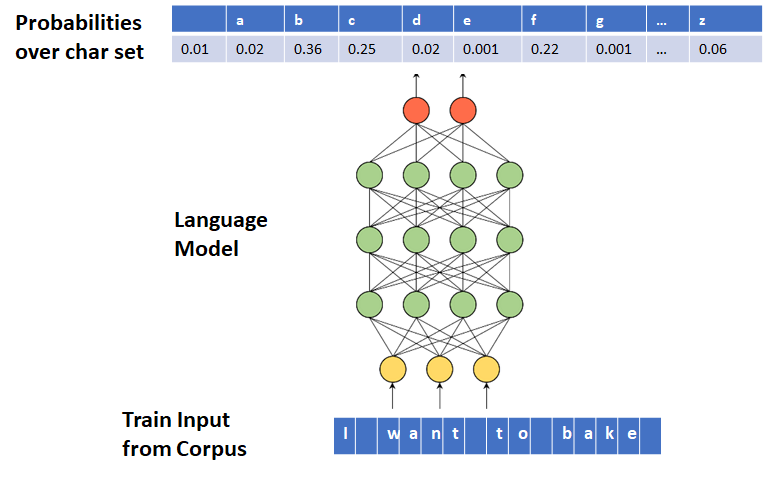

---
# 1. BUILD A TENSORFLOW INPUT PIPELINE 
For more information please refer to **Part B: Tensorflow Data Pipeline for Character Level Text Generation** on Youtube ( [ENGLISH](https://www.youtube.com/playlist?list=PLQflnv_s49v9QOres0xwKyu21Ai-Gi3Eu) / [TURKISH](https://www.youtube.com/playlist?list=PLQflnv_s49v-oEYNgoqK5e4GyUbodfET3)) or [Medium](https://medium.com/deep-learning-with-keras/text-generation-in-deep-learning-with-tensorflow-keras-e403aee375c1).

## What is a Data Pipeline?

Data Pipeline is an **automated** process that involves in **extracting**, **transforming**, **combining**, **validating**, and **loading** data for further analysis and visualization. 

It provides **end-to-end** velocity by ***eliminating*** errors and ***combatting*** bottlenecks or latency. 

It can process **multiple** data streams at once. 

In short, it is an **absolute necessity** for today’s data-driven solutions.

If you are **not familiar** with data pipelines, you can check my tutorials in [English](https://youtube.com/playlist?list=PLQflnv_s49v_m6KLMsORgs9hVIvDCwDAb) or [Turkish](https://youtube.com/playlist?list=PLQflnv_s49v8l8dYU01150vcoAn4sWSAm).


---
## What will we do in this Text Data pipeline?







We will create a data pipeline to **prepare training data for character-level text generator**.

Thus, in the pipeline, we will
* **open** & **load** corpus (text file)
* **convert** the text into sequence of characters
* **remove** unwanted characters such as punctuations, HTML tags, white spaces, etc.
* **generate** input (X) and output (y) pairs as character sequences
* **concatenate** input (X) and output (y) into train data
* **cache, prefetch, and batch** the train data for performance

---
## Input for the TensorFlow Pipeline

In [55]:
# For English text
!curl -O https://s3.amazonaws.com/text-datasets/nietzsche.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  586k  100  586k    0     0   726k      0 --:--:-- --:--:-- --:--:--  725k


In [56]:
# For Turkish text
#!curl -O https://raw.githubusercontent.com/kmkarakaya/ML_tutorials/master/data/mesnevi_Tumu.txt

---
## TensorFlow Pipeline

In [57]:
batch_size = 64
raw_data_ds = tf.data.TextLineDataset(["nietzsche.txt"])
#raw_data_ds = tf.data.TextLineDataset(["mesnevi_Tumu.txt"])

In [58]:
text=""

In [59]:
for elem in raw_data_ds:
   text=text+(elem.numpy().decode('utf-8'))
text[:150]

'PREFACESUPPOSING that Truth is a woman--what then? Is there not groundfor suspecting that all philosophers, in so far as they have beendogmatists, hav'

In [13]:
chars = sorted(list(set(text)))
print("Total disctinct chars:", len(chars))

Total disctinct chars: 83


In [14]:
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 20
step = 3
input_chars = []
next_char = []

In [15]:
for i in range(0, len(text) - maxlen, step):
    input_chars.append(text[i : i + maxlen])
    next_char.append(text[i + maxlen])

In [16]:
print("Number of sequences:", len(input_chars))
print("input X  (input_chars)  --->   output y (next_char) ")

for i in range(5):
  print( input_chars[i],"   --->  ", next_char[i])



Number of sequences: 196980
input X  (input_chars)  --->   output y (next_char) 
PREFACESUPPOSING tha    --->   t
FACESUPPOSING that T    --->   r
ESUPPOSING that Trut    --->   h
PPOSING that Truth i    --->   s
SING that Truth is a    --->    


In [17]:
X_train_ds_raw=tf.data.Dataset.from_tensor_slices(input_chars)
y_train_ds_raw=tf.data.Dataset.from_tensor_slices(next_char)

In [18]:
def custom_standardization(input_data):
    lowercase     = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, "<br />", " ")
    stripped_num  = tf.strings.regex_replace(stripped_html, "[\d-]", " ")
    stripped_punc  =tf.strings.regex_replace(stripped_num, 
                             "[%s]" % re.escape(string.punctuation), "")    
    return stripped_punc

def char_split(input_data):
  return tf.strings.unicode_split(input_data, 'UTF-8')

def word_split(input_data):
  return tf.strings.split(input_data)

In [19]:
# Model constants.
max_features = 96           # Number of distinct chars / words  
embedding_dim = 16             # Embedding layer output dimension
sequence_length = maxlen       # Input sequence size

In [20]:
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    split=char_split, # word_split or char_split
    output_mode="int",
    output_sequence_length=sequence_length,
)

In [21]:
vectorize_layer.adapt(X_train_ds_raw.batch(batch_size))

In [22]:
print("The size of the vocabulary (number of distinct characters): ", len(vectorize_layer.get_vocabulary()))

The size of the vocabulary (number of distinct characters):  34


In [23]:
def vectorize_text(text):
  text = tf.expand_dims(text, -1)
  return tf.squeeze(vectorize_layer(text))

In [24]:
# Vectorize the data.
X_train_ds = X_train_ds_raw.map(vectorize_text)
y_train_ds = y_train_ds_raw.map(vectorize_text)

X_train_ds.element_spec, y_train_ds.element_spec

(TensorSpec(shape=(20,), dtype=tf.int64, name=None),
 TensorSpec(shape=(20,), dtype=tf.int64, name=None))

In [25]:
y_train_ds=y_train_ds.map(lambda x: x[0])

In [26]:
train_ds =  tf.data.Dataset.zip((X_train_ds,y_train_ds))

In [27]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.shuffle(buffer_size=512).batch(batch_size, drop_remainder=True).cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
def decode_sequence (encoded_sequence):
  deceoded_sequence=[]
  for token in encoded_sequence:
    deceoded_sequence.append(vectorize_layer.get_vocabulary()[token])
  sequence= ''.join(deceoded_sequence)
  print("\t",sequence)
  return sequence

---
## Result of the Data Pipeline: 

In [45]:
for sample in train_ds.take(1):
  print("input (X) dimension: ", sample[0].numpy().shape, "\noutput (y) dimension: ",sample[1].numpy().shape)
  print("input (sequence of chars): ", sample[0][0].numpy(), "\noutput (next char to complete the input): ",sample[1][0].numpy())
  print("input (sequence of chars): ", decode_sequence (sample[0][0].numpy()), "\noutput (next char to complete the input): ",vectorize_layer.get_vocabulary()[sample[1][0].numpy()])

input (X) dimension:  (64, 20) 
output (y) dimension:  (64,)
input (sequence of chars):  [ 3 13  5 16  5 14  3  9  2  6  9  2  4 11  3  2 13  7 19 17] 
output (next char to complete the input):  6
	 edifices as the dogm
input (sequence of chars):  edifices as the dogm 
output (next char to complete the input):  a


In [47]:
print("Number of samples (sequences): ",len(train_ds)*batch_size)

Number of samples (sequences):  196928


For more information please refer to **Part B: Tensorflow Data Pipeline for Character Level Text Generation** on Youtube ( [ENGLISH](https://www.youtube.com/playlist?list=PLQflnv_s49v9QOres0xwKyu21Ai-Gi3Eu) / [TURKISH](https://www.youtube.com/playlist?list=PLQflnv_s49v-oEYNgoqK5e4GyUbodfET3)) or on [Medium](https://medium.com/deep-learning-with-keras/text-generation-in-deep-learning-with-tensorflow-keras-e403aee375c1).

---
# 2. PREPARE SAMPLING METHODS


In Text Generation, **sampling** means randomly **picking** the next token according to the generated **conditional probability distribution**.

That is, after generating the conditional  probability distribution over the set of tokens (*vocabulary*) for the given input sequence, we need to  carefully decide how to **select the next token** (***sample***) from this distribution. 



There are **several methods for sampling** in text generation (see [here](https://towardsdatascience.com/how-to-sample-from-language-models-682bceb97277) and [here](https://huggingface.co/blog/how-to-generate)):


* **Greedy Search (Maximization)** 


* **Temperature Sampling**

* **Top-K Sampling**
* **Top-P Sampling (Nucleus sampling)**

* **Beam Search**

In this tutorial, we will code Greedy Search, Temperature Sampling, and Top-K Sampling. 


For more information about Sampling, please review **Part D: Sampling in Text Generation** on Youtube ( [ENGLISH](https://www.youtube.com/playlist?list=PLQflnv_s49v9QOres0xwKyu21Ai-Gi3Eu) / [TURKISH](https://www.youtube.com/playlist?list=PLQflnv_s49v-oEYNgoqK5e4GyUbodfET3)) or [Medium](https://medium.com/deep-learning-with-keras/text-generation-in-deep-learning-with-tensorflow-keras-e403aee375c1).


In [31]:
def softmax(z):
   return np.exp(z)/sum(np.exp(z))

In [32]:
def greedy_search(conditional_probability):
  return (np.argmax(conditional_probability))

In [33]:
def temperature_sampling (conditional_probability, temperature=1.0):
  conditional_probability = np.asarray(conditional_probability).astype("float64")
  conditional_probability = np.log(conditional_probability) / temperature
  reweighted_conditional_probability = softmax(conditional_probability)
  probas = np.random.multinomial(1, reweighted_conditional_probability, 1)
  return np.argmax(probas)

In [34]:
def top_k_sampling(conditional_probability, k):
  top_k_probabilities, top_k_indices= tf.math.top_k(conditional_probability, k=k, sorted=True)
  top_k_probabilities= np.asarray(top_k_probabilities).astype("float32")
  top_k_probabilities= np.squeeze(top_k_probabilities)
  top_k_indices = np.asarray(top_k_indices).astype("int32")
  top_k_redistributed_probability=softmax(top_k_probabilities)
  top_k_redistributed_probability = np.asarray(top_k_redistributed_probability).astype("float32")
  sampled_token = np.random.choice(np.squeeze(top_k_indices), p=top_k_redistributed_probability)
  return sampled_token

# 3 AN ENCODER-DECODER LANGUAGE MODEL WITH BAHDANAU ATTENTION  FOR TEXT GENERATION

In this tutorial, we will use an Encoder-Decoder Model to create a Language Model for character-level text generation.


You can access the details of the **Encoder-Decoder Model and Bahdanau / Luong style Attention** from my ***tutorial series*** on YouTube (in [English](https://www.youtube.com/playlist?list=PLQflnv_s49v-4aH-xFcTykTpcyWSY4Tww) or [Turkish](https://www.youtube.com/playlist?list=PLQflnv_s49v97hDXtCo4mgje_SEiJ0_hH)) or [Medium](https://medium.com/deep-learning-with-keras/sequence-to-sequence-learning-c8be6cd34848).



## 3.1 Define the model

As we already prepared the training dataset, we need to define the input specs accordingly.

Remember that in train set, 
* the length of the input (X) sequence (**sequence_length**) is **20** tokens (chars)
*  the length of the output (y) sequence  is **1** token (char)



### Design Attention Layer

Since we aim to use an Encoder-Decoder model with Bahdanau (Addititive) Attention mechanism, we need to first define this layer as below.

You can also use [Keras AdditiveAttention layer](https://keras.io/api/layers/attention_layers/additive_attention/), however I prefer to use this custom code.

For the details of the **Encoder-Decoder Model and Bahdanau / Luong style Attention**, you can access the ***tutorial series*** on YouTube (in [English](https://www.youtube.com/playlist?list=PLQflnv_s49v-4aH-xFcTykTpcyWSY4Tww) or [Turkish](https://www.youtube.com/playlist?list=PLQflnv_s49v97hDXtCo4mgje_SEiJ0_hH)) or [Medium](https://medium.com/deep-learning-with-keras/sequence-to-sequence-learning-c8be6cd34848).


In [35]:
LSTMoutputDimension=64
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units, verbose=0):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)
    self.verbose= verbose

  def call(self, query, values):
    if self.verbose:
      print('\n******* Bahdanau Attention STARTS******')
      print('query (decoder hidden state): (batch_size, hidden size) ', query.shape)
      print('values (encoder all hidden state): (batch_size, max_len, hidden size) ', values.shape)

    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)
    
    if self.verbose:
      print('query_with_time_axis:(batch_size, 1, hidden size) ', query_with_time_axis.shape)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))
    if self.verbose:
      print('score: (batch_size, max_length, 1) ',score.shape)
    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)
    if self.verbose:
      print('attention_weights: (batch_size, max_length, 1) ',attention_weights.shape)
    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    if self.verbose:
      print('context_vector before reduce_sum: (batch_size, max_length, hidden_size) ',context_vector.shape)
    context_vector = tf.reduce_sum(context_vector, axis=1)
    if self.verbose:
      print('context_vector after reduce_sum: (batch_size, hidden_size) ',context_vector.shape)
      print('\n******* Bahdanau Attention ENDS******')
    return context_vector, attention_weights

### Define the Encoder-Decoder

Now, we can design the model:

* We will first provide the data pipeline parameters we set so far
* Using the Keras Embedding layer, the input tokens will be converted to a higher dimensional representation.
* Using the Keras LSTM layer as the encoder, we will encode the input sequence into a compact representation.
* After initializing the Attention and Decoder layers, the decoder runs in a loop to generate an output for the given input sequence.

For more details, please see the **Encoder-Decoder Model and Bahdanau / Luong style Attention** tutorial series on YouTube (in [English](https://www.youtube.com/playlist?list=PLQflnv_s49v-4aH-xFcTykTpcyWSY4Tww) or [Turkish](https://www.youtube.com/playlist?list=PLQflnv_s49v97hDXtCo4mgje_SEiJ0_hH)) or [Medium](https://medium.com/deep-learning-with-keras/sequence-to-sequence-learning-c8be6cd34848).

In [36]:
verbose= 0 
#See all debug messages

#batch_size=1
if verbose:
  print('***** Model Hyper Parameters *******')
  print('latentSpaceDimension: ', LSTMoutputDimension)
  print('batch_size: ', batch_size)
  print('sequence length (n_timesteps_in): ', max_features )
  print('n_features: ', embedding_dim)

  print('\n***** TENSOR DIMENSIONS *******')

# The first part is encoder
# A integer input for vocab indices.
encoder_inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64", name='encoder_inputs')
#encoder_inputs = Input(shape=(n_timesteps_in, n_features), name='encoder_inputs')

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
embedding = layers.Embedding(max_features, embedding_dim)
embedded= embedding(encoder_inputs)

encoder_lstm = layers.LSTM(LSTMoutputDimension,return_sequences=True, return_state=True,  name='encoder_lstm')
encoder_outputs, encoder_state_h, encoder_state_c = encoder_lstm(embedded)

if verbose:
  print ('Encoder output shape: (batch size, sequence length, latentSpaceDimension) {}'.format(encoder_outputs.shape))
  print ('Encoder Hidden state shape: (batch size, latentSpaceDimension) {}'.format(encoder_state_h.shape))
  print ('Encoder Cell state shape: (batch size, latentSpaceDimension) {}'.format(encoder_state_c.shape))
# initial context vector is the states of the encoder
encoder_states = [encoder_state_h, encoder_state_c]
if verbose:
  print(encoder_states)
# Set up the attention layer
attention= BahdanauAttention(LSTMoutputDimension, verbose=verbose)


# Set up the decoder layers
decoder_inputs = layers.Input(shape=(1, (embedding_dim+LSTMoutputDimension)),name='decoder_inputs')
decoder_lstm = layers.LSTM(LSTMoutputDimension,  return_state=True, name='decoder_lstm')
decoder_dense = layers.Dense(max_features, activation='softmax',  name='decoder_dense')

all_outputs = []

# 1 initial decoder's input data
# Prepare initial decoder input data that just contains the start character 
# Note that we made it a constant one-hot-encoded in the model
# that is, [1 0 0 0 0 0 0 0 0 0] is the first input for each loop
# one-hot encoded zero(0) is the start symbol
inputs = np.zeros((batch_size, 1, max_features))
inputs[:, 0, 0] = 1 
# 2 initial decoder's state
# encoder's last hidden state + last cell state
decoder_outputs = encoder_state_h
states = encoder_states
if verbose:
  print('initial decoder inputs: ', inputs.shape)

# decoder will only process one time step at a time.
for _ in range(1):

    # 3 pay attention
    # create the context vector by applying attention to 
    # decoder_outputs (last hidden state) + encoder_outputs (all hidden states)
    context_vector, attention_weights=attention(decoder_outputs, encoder_outputs)
    if verbose:
      print("Attention context_vector: (batch size, units) {}".format(context_vector.shape))
      print("Attention weights : (batch_size, sequence_length, 1) {}".format(attention_weights.shape))
      print('decoder_outputs: (batch_size,  latentSpaceDimension) ', decoder_outputs.shape )

    context_vector = tf.expand_dims(context_vector, 1)
    if verbose:
      print('Reshaped context_vector: ', context_vector.shape )

    # 4. concatenate the input + context vectore to find the next decoder's input
    inputs = tf.concat([context_vector, tf.dtypes.cast(inputs, tf.float32)], axis=-1)
    
    if verbose:
      print('After concat inputs: (batch_size, 1, n_features + hidden_size): ',inputs.shape )

    # 5. passing the concatenated vector to the LSTM
    # Run the decoder on one timestep with attended input and previous states
    decoder_outputs, state_h, state_c = decoder_lstm(inputs,
                                                     initial_state=states)
    #decoder_outputs = tf.reshape(decoder_outputs, (-1, decoder_outputs.shape[2]))
  
    outputs = decoder_dense(decoder_outputs)
    # 6. Use the last hidden state for prediction the output
    # save the current prediction
    # we will concatenate all predictions later
    outputs = tf.expand_dims(outputs, 1)
    all_outputs.append(outputs)
    # 7. Reinject the output (prediction) as inputs for the next loop iteration
    # as well as update the states
    inputs = outputs
    states = [state_h, state_c]


# 8. After running Decoder for max time steps
# we had created a predition list for the output sequence
# convert the list to output array by Concatenating all predictions 
# such as [batch_size, timesteps, features]
decoder_outputs = layers.Lambda(lambda x: K.concatenate(x, axis=1))(all_outputs)

# 9. Define and compile model 
model_encoder_decoder_Bahdanau_Attention = Model(encoder_inputs, 
                                                 decoder_outputs, name='model_encoder_decoder')




## 3.2  Compile the model

Since we use **integers to represent the output** (Y), that is; ***we do not use one-hot encoding***, we need to use `sparse_categorical_crossentropy` loss function.

In [37]:
model_encoder_decoder_Bahdanau_Attention.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001), 
                                                 loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Here is the summary of the model. Pay attention that the output of the model is  `(64, 1, 96)`. That is, for **each input in the batch** (***64***), we have **1 output** represented by **96 logits**.  ***96*** is the size of the vocabulary. Thus, the model will **predict** the **next token (y)** by providing the ***conditional probabilities*** of each token (char) in the vocabulary.

In [38]:
model_encoder_decoder_Bahdanau_Attention.summary()

Model: "model_encoder_decoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_inputs (InputLayer)     [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 20, 16)       1536        encoder_inputs[0][0]             
__________________________________________________________________________________________________
encoder_lstm (LSTM)             [(None, 20, 64), (No 20736       embedding[0][0]                  
__________________________________________________________________________________________________
bahdanau_attention (BahdanauAtt ((None, 64), (None,  8385        encoder_lstm[0][1]               
                                                                 encoder_lstm[

## 3.3 Train the model

We train the Language Model for 3 epochs.

In [39]:
model_encoder_decoder_Bahdanau_Attention.fit(train_ds, epochs=3)


Epoch 1/3
3077/3077 [==============================] - 114s 26ms/step - loss: 2.7572 - accuracy: 0.2109
Epoch 2/3
3077/3077 [==============================] - 41s 13ms/step - loss: 2.2220 - accuracy: 0.3369
Epoch 3/3
3077/3077 [==============================] - 41s 13ms/step - loss: 2.0508 - accuracy: 0.3893


In [40]:
model_encoder_decoder_Bahdanau_Attention.save("model_encoder_decoder_Bahdanau_Attention")

INFO:tensorflow:Assets written to: model_encoder_decoder_Bahdanau_Attention/assets


INFO:tensorflow:Assets written to: model_encoder_decoder_Bahdanau_Attention/assets


## 3.4 Create the Inference Model

The trained Encoder-Decoder model is designed to handle batches of inputs.

However, in inference (text generation), we need to use this model by one sample (input) only. 

Therefore, below we create an inference model by using the rained layers of the previous model.

In [43]:
# The first part is encoder
# A integer input for vocab indices.
encoder_inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64", name='encoder_inputs')

embedded= embedding(encoder_inputs)
encoder_outputs, encoder_state_h, encoder_state_c = encoder_lstm(embedded)

encoder_states = [encoder_state_h, encoder_state_c]

all_outputs = []

inputs = np.zeros((1, 1, max_features))
inputs[:, 0, 0] = 1 

decoder_outputs = encoder_state_h
states = encoder_states

context_vector, attention_weights=attention(decoder_outputs, encoder_outputs)
context_vector = tf.expand_dims(context_vector, 1)
inputs = tf.concat([context_vector, tf.dtypes.cast(inputs, tf.float32)], axis=-1)
decoder_outputs, state_h, state_c = decoder_lstm(inputs, initial_state=states)
outputs = decoder_dense(decoder_outputs)
outputs = tf.expand_dims(outputs, 1)


# 9. Define and compile model 
model_encoder_decoder_Bahdanau_Attention_PREDICTION = Model(encoder_inputs, 
                                                 outputs, name='model_encoder_decoder')


## 3.5 An Auxillary Function for Decoding Token Index to Characters

We need to convert the given ***token index*** to the ***corresponding character*** for each token in the generated text. Therefore, I prepare the `decode_sequence ()` function as below:

In [41]:
def decode_sequence (encoded_sequence):
  deceoded_sequence=[]
  for token in encoded_sequence:
    deceoded_sequence.append(vectorize_layer.get_vocabulary()[token])
  sequence= ''.join(deceoded_sequence)
  print("\t",sequence)
  return sequence


## 3.6 Another Auxillary Function for Generating Text

To generate text with ***various sampling methods***, I prepare the following function. The `generate_text(model, prompt, step)` function takes the **trained Language Model**, the **prompt**, and the **length of the text** to be generated as the parameters. Then, it generates text with **three different sampling methods**.

In [42]:
def generate_text(model, seed_original, step):
    seed= vectorize_text(seed_original)
    print("The prompt is")
    decode_sequence(seed.numpy().squeeze())
    

    seed= vectorize_text(seed_original).numpy().reshape(1,-1)
    #Text Generated by Greedy Search Sampling
    generated_greedy_search = (seed)
    for i in range(step):
      predictions=model.predict(seed)
      next_index= greedy_search(predictions.squeeze())
      generated_greedy_search = np.append(generated_greedy_search, next_index)
      seed= generated_greedy_search[-sequence_length:].reshape(1,sequence_length)
    print("Text Generated by Greedy Search Sampling:")
    decode_sequence(generated_greedy_search)

    #Text Generated by Temperature Sampling
    print("Text Generated by Temperature Sampling:")
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print("\ttemperature: ", temperature)
        seed= vectorize_text(seed_original).numpy().reshape(1,-1)
        generated_temperature = (seed)
        for i in range(step):
            predictions=model.predict(seed)
            next_index = temperature_sampling(predictions.squeeze(), temperature)
            generated_temperature = np.append(generated_temperature, next_index)
            seed= generated_temperature[-sequence_length:].reshape(1,sequence_length)
        decode_sequence(generated_temperature)

    #Text Generated by Top-K Sampling
    print("Text Generated by Top-K Sampling:")
    for k in [2, 3, 4, 5]:
        print("\tTop-k: ", k)
        seed= vectorize_text(seed_original).numpy().reshape(1,-1)
        generated_top_k = (seed)
        for i in range(step):
            predictions=model.predict(seed)
            next_index = top_k_sampling(predictions.squeeze(), k)
            generated_top_k = np.append(generated_top_k, next_index)
            seed= generated_top_k[-sequence_length:].reshape(1,sequence_length)
        decode_sequence(generated_top_k)

## 3.7 Generate the text

We can call the `generate_text()` function by providing the ***trained LM***, a ***prompt*** and the ***sequence length*** of the text to be generated as below.

You can run this method for multiple times to observe the generated text with different sampling methods.

In [44]:
generate_text(model_encoder_decoder_Bahdanau_Attention_PREDICTION, 
              "Who is it really that puts questions to", 
              100)

The prompt is
	 who is it really tha
Text Generated by Greedy Search Sampling:
	 who is it really that the sand and the sand to the sand and the sand to the sand and the sand to the sand and the sand t
Text Generated by Temperature Sampling:
	temperature:  0.2
	 who is it really that the seent of the sand the sand as the sand the sand and are and the sand and and mand and the sand
	temperature:  0.5
	 who is it really that his all of beling in the cantsing of the mand of man of the seration of the canding of and becate 
	temperature:  1.0
	 who is it really that soghe beley andeency into his mander tos swignction bection and dived saunaishitiojulew of arl the
	temperature:  1.2
	 who is it really that andixhatileoqhelyibredesvacabpo radfertiontitygingtormatisveys fark of badil theirevon rawains 
Text Generated by Top-K Sampling:
	Top-k:  2
	 who is it really than some and to suct and than soul theil to sacte of to that than seel too that the contions offrower 
	Top-k:  3
	 who is it re

# 4 OBSERVATIONS

## Info about the corpus

* The size of the vocabulary (number of distinct characters):  **34**
* The number of generated sequences: **196980**
* The maximum length of sequences: **20**


Note that this **corpus actually is not sufficient** to generate high-quality texts. However, due to the limitations of the Colab platform (RAM and GPU), I used this corpus for **demonstration purposes**. 

Therefore, please keep in mind these limitations  when considering the generated texts. 

## About the Language Modle
* We implement an Encoder-Decoder model with the Bahdanau attention mechanism. In encoder and decoder parts, we use single, uni-directional LSTM layers. Thus, we do not expect this simple model to create high-quality texts.
* On the other hand, you can try to improve this model by incrementing the number of LSTM layers in encoder and decoder parts, the output dimension of the embedding and LSTM layers, etc.

## Greedy Search
* The method simply ***selects*** the token with the **highest probability** as its next token (*word or char*).

* However, if we always sample the  most likely word, the standard language model training objective causes us to **get stuck in loops** like above.

## Temperature Sampling
* If **temperature** is set to **very low values or 0**, then Temperature Sampling becomes **equivalent** to the **Greedy Search** and results in extremely **repetitive** and **predictable** text.

* With **higher temperatures**, the generated text becomes more **random**, **interesting**, **surprising**, even creative; it may sometimes invent completely new words (*misspelled words*) that sound somewhat **plausible**. 

## Top-k Sampling
* In the studies, it is reported that the top-k sampling appears to **improve quality** by **removing the tail** and making it less likely to go off topic. 

* However in our case, there are not **many tokens** we could sample from reasonably (***broad distribution***).
* Thus, in above examples, Top-K generates texts mostly look like random.

* Therefore, **k** value should be chosen **carefully** with respect to size of token dictionary.


# CONCLUSION:
In this tutorial, we apply the following steps to generate  ***character level*** text generation:
* download a corpus
* apply the **Tensorflow Data Pipeline** 
* create an **Encoder-Decoder model**
* use three sampling methods

[In the next parts](https://kmkarakaya.medium.com/text-generation-in-deep-learning-with-tensorflow-keras-e403aee375c1), we will see 


**Part G**: **Transformer Model** for **Character Level** Text Generation

**Part H**: Recurrent Neural Network (LSTM) Model for Word Level Text Generation

**Part I**: Encoder-Decoder Model for Word Level Text Generation

**Part J**: Transformer Model for Word Level Text Generation
